In [65]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.rc('font', size=10)

In [66]:
palette_values2 =  ['#00B0BE', '#F45F74', '#98C127', '#FFCD8E', '#FFB255', '#C17ADC', '#005D82']
colors2 = sns.color_palette(palette_values2)
colors2

[(0.0, 0.6901960784313725, 0.7450980392156863),
 (0.9568627450980393, 0.37254901960784315, 0.4549019607843137),
 (0.596078431372549, 0.7568627450980392, 0.15294117647058825),
 (1.0, 0.803921568627451, 0.5568627450980392),
 (1.0, 0.6980392156862745, 0.3333333333333333),
 (0.7568627450980392, 0.47843137254901963, 0.8627450980392157),
 (0.0, 0.36470588235294116, 0.5098039215686274)]

In [67]:
colors_antiviral2 = sns.color_palette(['#00B0BE', '#C17ADC', '#005D82'])
colors_antiviral = sns.color_palette(['#4fb0b5', '#9d79ab', '#066387'])
colors_antiviral3 = sns.color_palette(['#0892A5', '#FDE12D', '#EA526F'])

In [68]:
df_data = pd.read_csv('../../data/described/described_antiviral.csv')
df_data.head()

,sequence,experimental_characteristics,half_life_seconds,length_sequence,hl_category,Molecular Weight,Isoelectric point,Charge density,Charge,Instability index,...,freq_L,freq_M,freq_P,freq_Q,freq_R,freq_S,freq_T,freq_V,freq_W,freq_Y
0,AAAMSQVTN,Mammalian,15840.0,9,1,891.01,12.2500,0.00112,0.996,44.6000,...,0.0000,0.1111,0.0000,0.1111,0.0000,0.1111,0.1111,0.1111,0.0000,0.0000
1,AACEVAKNLNESLIDLQELGKYEQYIKW,Mammalian,15840.0,28,1,3268.71,4.6846,-0.00033,-1.068,46.1643,...,0.1429,0.0000,0.0000,0.0714,0.0000,0.0357,0.0000,0.0357,0.0357,0.0714
2,AAGAVVNDL,Mammalian,15840.0,9,1,827.93,6.5000,-0.00000,-0.004,-0.5444,...,0.1111,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2222,0.0000,0.0000
3,AAHLIDALYAEFLGGRVLTT,Mammalian,15840.0,20,1,2130.46,7.6719,0.00005,0.096,23.2650,...,0.2000,0.0000,0.0000,0.0000,0.0500,0.0000,0.1000,0.0500,0.0000,0.0500
4,AAHLIDALYAEFLGGRVLTTPVVHRALFYASAVLRQPFLAGVPSA,Mammalian,15840.0,45,1,4779.56,10.1865,0.00046,2.194,58.3624,...,0.1556,0.0000,0.0667,0.0222,0.0667,0.0444,0.0444,0.1111,0.0000,0.0444


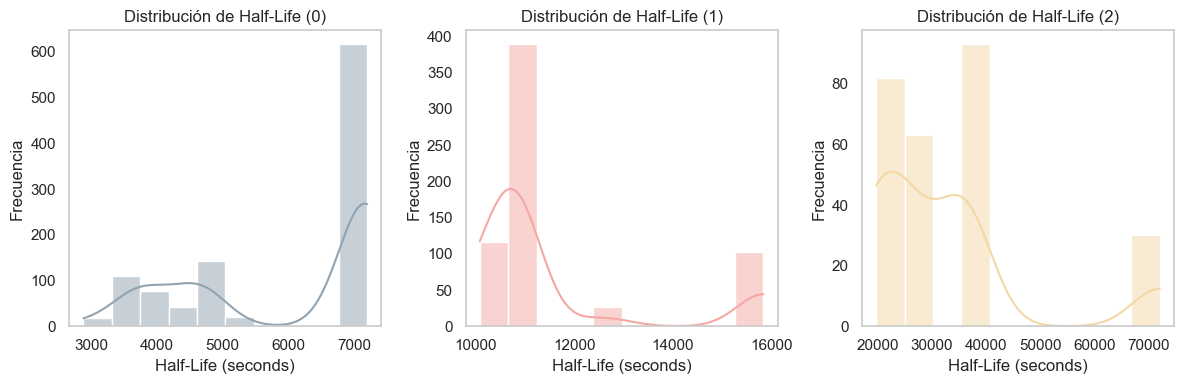

In [69]:
# Configurar estilo
sns.set(style="whitegrid", palette="pastel")

# Definir categorías y colores
categorias = [0, 1, 2]
colores = ["#91A3B0", "#F4A8A3", "#F5D7A6"]  # Tonos pastel

# Crear figura con subgráficos
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Graficar histogramas con KDE
for i, categoria in enumerate(categorias):
    ax = axes[i]
    sns.histplot(df_data[df_data["hl_category"] == categoria]["half_life_seconds"], 
                 kde=True, bins=10, color=colores[i], ax=ax)
    ax.set_title(f"Distribución de Half-Life ({categoria})")
    ax.set_xlabel("Half-Life (seconds)")
    ax.set_ylabel("Frecuencia")
    ax.grid(False)


# Ajustar diseño
plt.tight_layout()

In [70]:
df_data.value_counts('hl_category')

hl_category
0    1027
1     634
2     268
Name: count, dtype: int64

In [71]:
df_data.columns

Index(['sequence', 'experimental_characteristics', 'half_life_seconds',
       'length_sequence', 'hl_category', 'Molecular Weight',
       'Isoelectric point', 'Charge density', 'Charge', 'Instability index',
       'Aromaticity', 'Aliphatic index', 'Boman index', 'Hydrophobic ratio',
       'freq_A', 'freq_C', 'freq_D', 'freq_E', 'freq_F', 'freq_G', 'freq_H',
       'freq_I', 'freq_N', 'freq_K', 'freq_L', 'freq_M', 'freq_P', 'freq_Q',
       'freq_R', 'freq_S', 'freq_T', 'freq_V', 'freq_W', 'freq_Y'],
      dtype='object')

In [72]:
new_names = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'N', 'K', 'L', 'M', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
old_names = ['freq_A', 'freq_C', 'freq_D', 'freq_E', 'freq_F', 'freq_G', 'freq_H', 'freq_I', 'freq_N', 'freq_K', 'freq_L', 'freq_M',
                      'freq_P', 'freq_Q', 'freq_R', 'freq_S', 'freq_T', 'freq_V', 'freq_W', 'freq_Y']
df_data.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [73]:
df_data

,sequence,experimental_characteristics,half_life_seconds,length_sequence,hl_category,Molecular Weight,Isoelectric point,Charge density,Charge,Instability index,...,L,M,P,Q,R,S,T,V,W,Y
0,AAAMSQVTN,Mammalian,15840.0,9,1,891.01,12.2500,0.00112,0.996,44.6000,...,0.0000,0.1111,0.0000,0.1111,0.0000,0.1111,0.1111,0.1111,0.0000,0.0000
1,AACEVAKNLNESLIDLQELGKYEQYIKW,Mammalian,15840.0,28,1,3268.71,4.6846,-0.00033,-1.068,46.1643,...,0.1429,0.0000,0.0000,0.0714,0.0000,0.0357,0.0000,0.0357,0.0357,0.0714
2,AAGAVVNDL,Mammalian,15840.0,9,1,827.93,6.5000,-0.00000,-0.004,-0.5444,...,0.1111,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2222,0.0000,0.0000
3,AAHLIDALYAEFLGGRVLTT,Mammalian,15840.0,20,1,2130.46,7.6719,0.00005,0.096,23.2650,...,0.2000,0.0000,0.0000,0.0000,0.0500,0.0000,0.1000,0.0500,0.0000,0.0500
4,AAHLIDALYAEFLGGRVLTTPVVHRALFYASAVLRQPFLAGVPSA,Mammalian,15840.0,45,1,4779.56,10.1865,0.00046,2.194,58.3624,...,0.1556,0.0000,0.0667,0.0222,0.0667,0.0444,0.0444,0.1111,0.0000,0.0444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,YVREHGVPIHADKYFEQVLK,Mammalian,10080.0,20,1,2427.77,9.4360,0.00049,1.195,9.4700,...,0.0500,0.0000,0.0500,0.0500,0.0500,0.0000,0.0000,0.1500,0.0000,0.1000
1925,YWILEYLWKVPFDFWRGV,E_coli,7200.0,18,0,2416.82,9.4746,0.00041,0.996,42.1722,...,0.1111,0.0000,0.0556,0.0000,0.0556,0.0000,0.0000,0.1111,0.1667,0.1111
1926,YWILEYLWKVPFDFWRGV,Mammalian,10080.0,18,1,2416.82,9.4746,0.00041,0.996,42.1722,...,0.1111,0.0000,0.0556,0.0000,0.0556,0.0000,0.0000,0.1111,0.1667,0.1111
1927,YWILEYLWKVPFDFWRGV,Yeast,36000.0,18,2,2416.82,9.4746,0.00041,0.996,42.1722,...,0.1111,0.0000,0.0556,0.0000,0.0556,0.0000,0.0000,0.1111,0.1667,0.1111


In [74]:
columns_with_properties = ['Molecular Weight', 'Isoelectric point', 'Charge density', 'Charge',
       'Instability index', 'Aromaticity', 'Aliphatic index', 'Boman index',
       'Hydrophobic ratio']

In [75]:
list_df = []
for column in new_names:
    df_values = df_data[[column, "hl_category"]]
    df_values.columns = ["Percentage", "hl_category"]
    df_values["Residue"] = column
    list_df.append(df_values)

df_process = pd.concat(list_df, axis=0)
df_process

,Percentage,hl_category,Residue
0,0.3333,1,A
1,0.1071,1,A
2,0.3333,1,A
3,0.2000,1,A
4,0.2000,1,A
...,...,...,...
1924,0.1000,1,Y
1925,0.1111,0,Y
1926,0.1111,1,Y
1927,0.1111,2,Y


In [76]:
df_process['Percentage'] = df_process['Percentage'] * 100

In [77]:
hl_order = [0, 1, 2]
df_process["hl_category"] = pd.Categorical(df_process["hl_category"], categories=hl_order, ordered=True)

Tendencia con respecto a categoria de vida media
Residuos interesantes ver diferencia
Ejemplos de residuos interesantes K(Glicina), I, R, V?
Agregar significancia estadistica para comparar diferencia de proporciones (Kruskal, ANOVA)
Preguntarse si Dentro de las 3 proporciones que tengo exista alguna diferentes (seran 3 conteos diferentes, distribuciones diferesn de los 3 muestreos de datos) La distribucion son 3 por cada residuo, dentro de estas 3 dsitrbuciones existe alguna que sea diferente entre ellas? Luego identificar cual es la que es diferente entre ellas (Analisis de datos de comparaciones, ANOVA, kruskal) 15

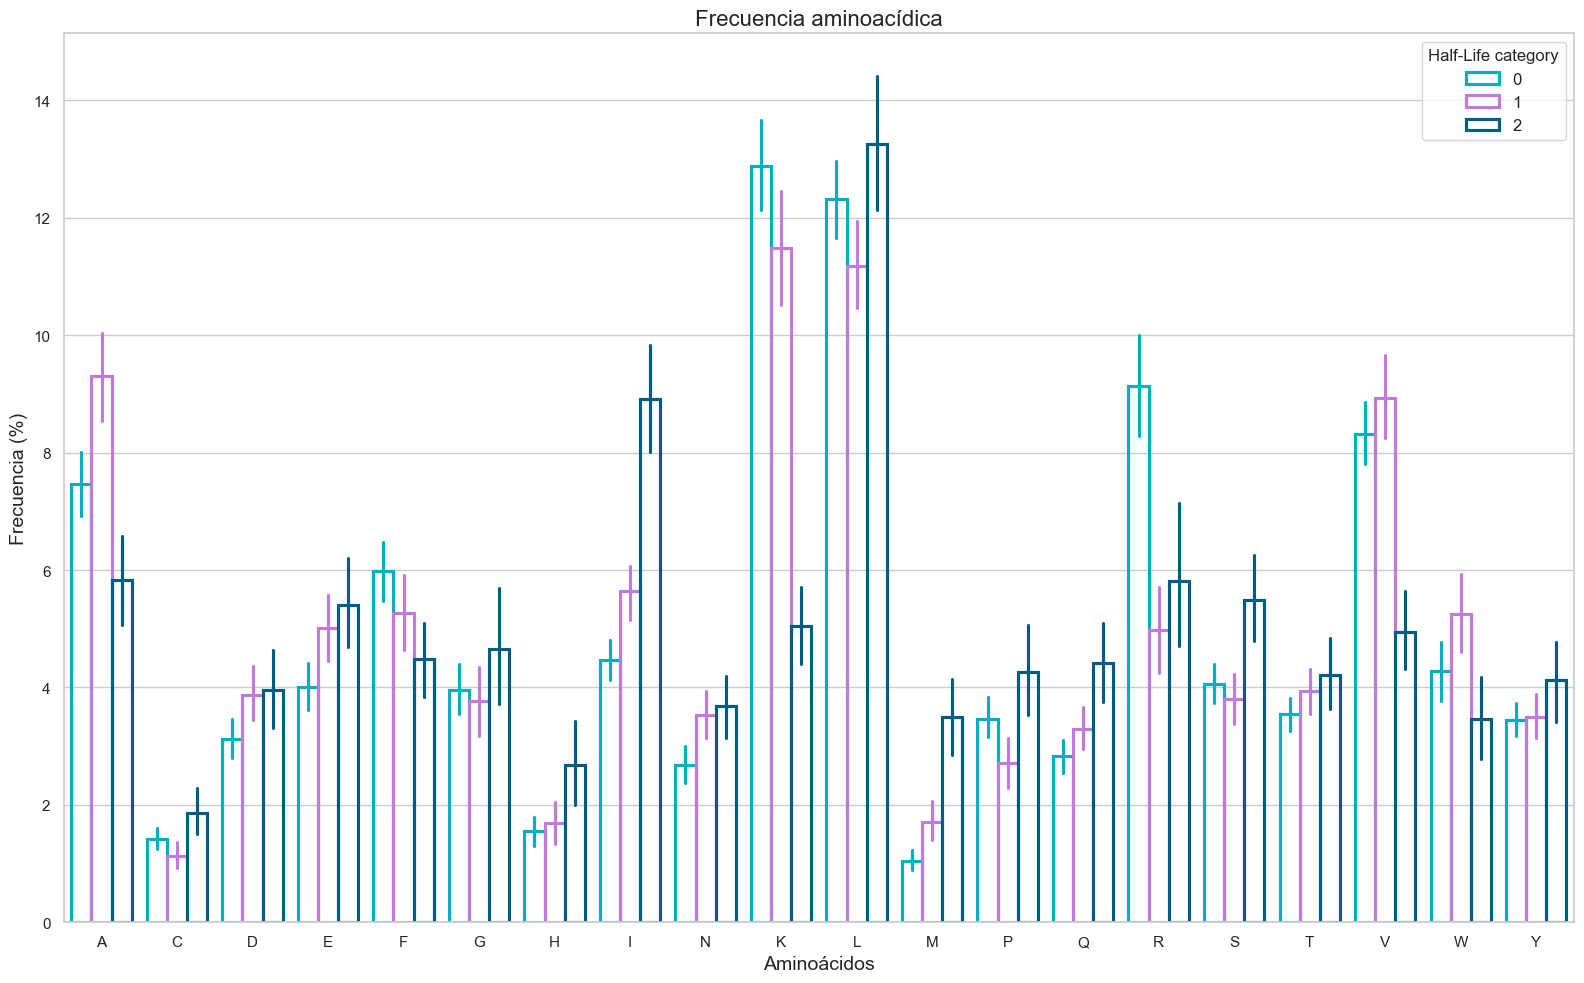

In [78]:
fig, ax = plt.subplots(figsize=(16, 10))

# Graficar el barplot
sns.barplot(ax=ax, data=df_process, x="Residue", y="Percentage", hue="hl_category", 
            orient="v", palette=colors_antiviral2, fill=False)

# Personalizar el gráfico
ax.set_title("Frecuencia aminoacídica", fontsize=16)
ax.legend(title="Half-Life category", fontsize=12)
plt.ylabel("Frecuencia (%)", fontsize=14)
plt.xlabel("Aminoácidos", fontsize=14)
# Ajustar diseño y guardar
plt.tight_layout()
plt.savefig("../../img/antiviral/description_amino_category.png", dpi=300, bbox_inches='tight')
plt.show()

In [79]:
df_process.groupby(["Residue", "hl_category"]).mean()

Percentage
Residue hl_category            
A       0              7.471052
        1              9.302634
        2              5.828993
C       0              1.425044
        1              1.130710
        2              1.860075
D       0              3.129757
        1              3.867950
        2              3.957090
E       0              4.004167
        1              5.008170
        2              5.397799
F       0              5.977176
        1              5.275915
        2              4.482015
G       0              3.963291
        1              3.762729
        2              4.651940
H       0              1.547108
        1              1.683722
        2              2.679925
I       0              4.461977
        1              5.641751
        2              8.909552
K       0             12.883019
        1             11.485189
        2              5.051791
L       0             12.317001
        1             11.183470
        2             13.263433
M       0              1.051461
        1              1.715836
        2              3.494888
N       0              2.686125
        1              3.533218
        2              3.690299
P       0              3.466203
        1              2.706309
        2              4.257351
Q       0              2.824567
        1              3.296420
        2              4.422388
R       0              9.141529
        1              4.985741
        2              5.819440
S       0              4.054051
        1              3.800505
        2              5.497910
T       0              3.540438
        1              3.933218
        2              4.204291
V       0              8.323866
        1              8.935268
        2              4.942015
W       0              4.280594
        1              5.253076
        2              3.462948
Y       0              3.454129
        1              3.498360
        2              4.126045

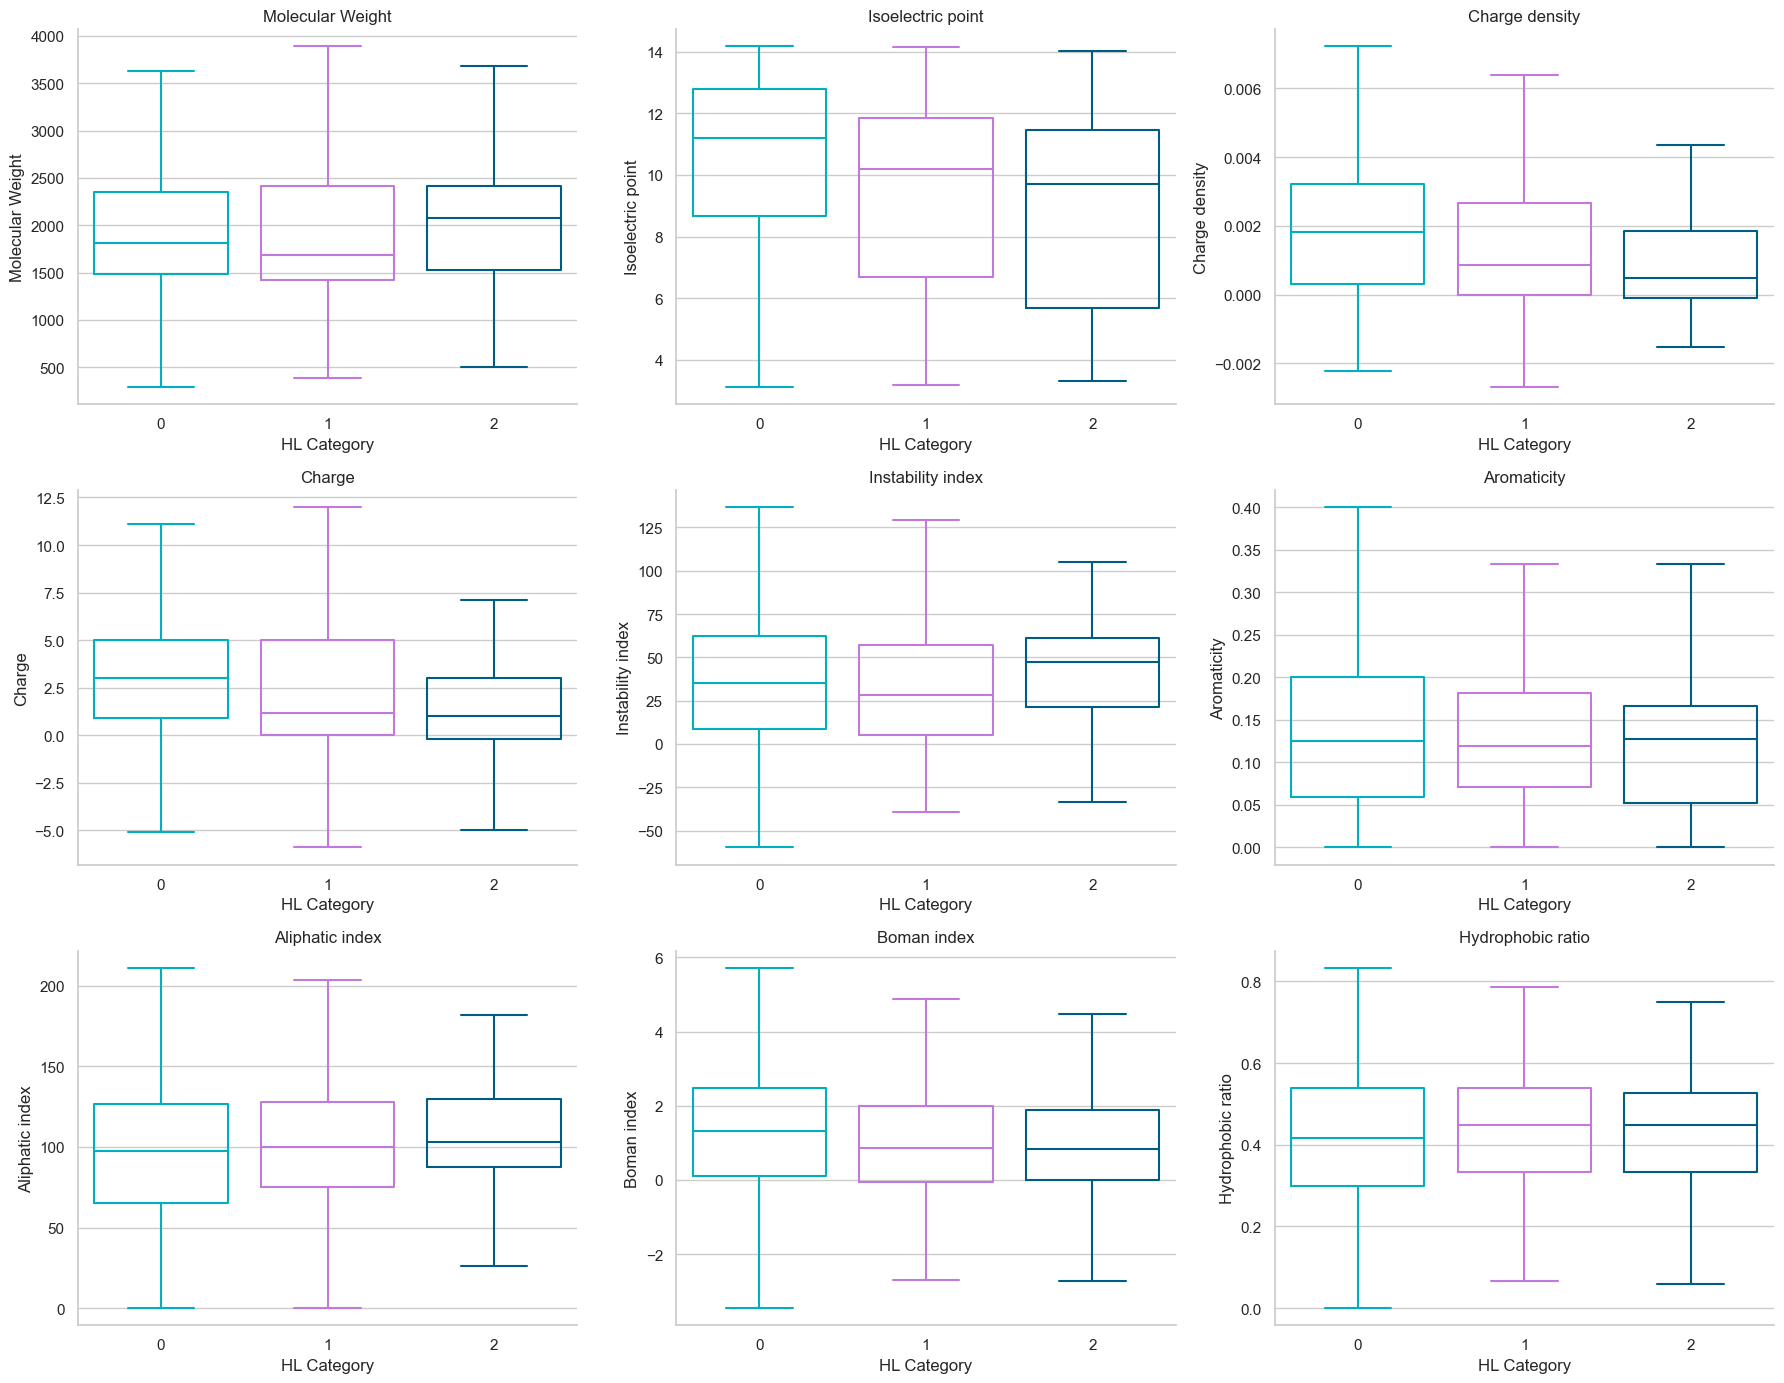

In [80]:
fig = plt.figure(figsize=(18, 14))
gs = plt.GridSpec(3, 3, figure=fig)  # Ajustamos a 3x3 si hay 9 gráficos

for i, col in enumerate(columns_with_properties):
    row, col_position = divmod(i, 3)
    ax = fig.add_subplot(gs[row, col_position])
    #ver boxenplot y histplot
    sns.boxplot(
        ax=ax,
        data=df_data,
        x="hl_category",
        y=col,
        order=hl_order,  # Orden corregido
        palette=colors_antiviral2,  # Colores personalizados
        showfliers=False,
        fill=False
    )
    
    ax.set_title(col, fontsize=12)
    ax.set_xlabel("HL Category", fontsize=12)
    ax.set_ylabel(col, fontsize=12)

sns.despine()

plt.tight_layout()
plt.savefig("../../img/antiviral/boxplot_hl_category.png", dpi=300, bbox_inches="tight")
plt.show()

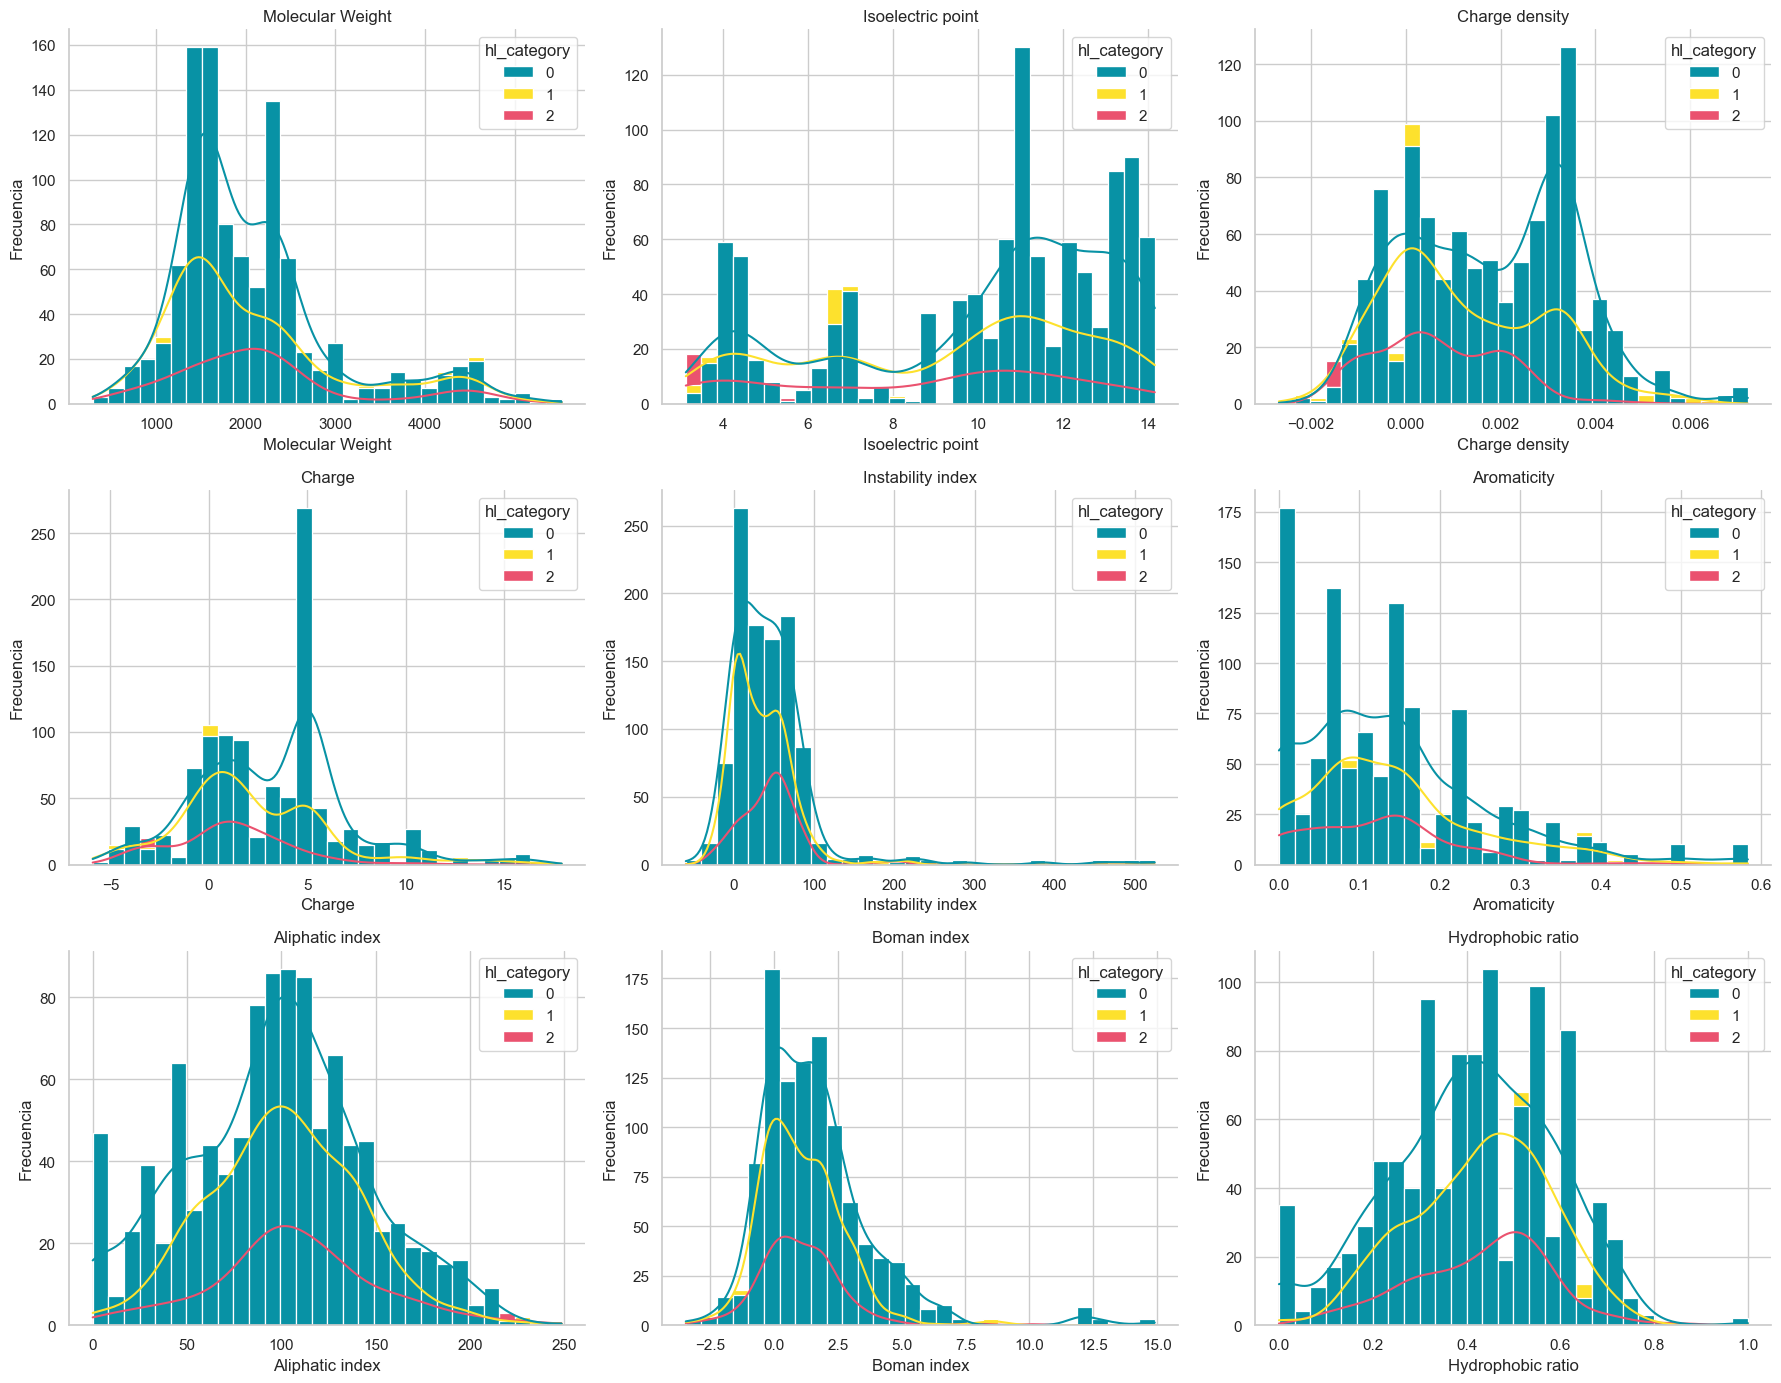

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(18, 14))
gs = plt.GridSpec(3, 3, figure=fig)  # Ajustamos a 3x3 si hay 9 gráficos

for i, col in enumerate(columns_with_properties):
    row, col_position = divmod(i, 3)
    ax = fig.add_subplot(gs[row, col_position])
    
    # Histograma con separación por categoría
    sns.histplot(
        data=df_data,
        x=col,
        hue="hl_category",
        hue_order=hl_order,  # Orden corregido
        palette=colors_antiviral3,  # Colores personalizados
        bins=30,
        kde=True,
        ax=ax,
        alpha=1
    )

    ax.set_title(col, fontsize=12)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)

sns.despine()

plt.tight_layout()
plt.savefig("../../img/antiviral/histplot_hl_category.png", dpi=300, bbox_inches="tight")
plt.show()


In [82]:
df_data[df_data["length_sequence"]==4]

,sequence,experimental_characteristics,half_life_seconds,length_sequence,hl_category,Molecular Weight,Isoelectric point,Charge density,Charge,Instability index,...,L,M,P,Q,R,S,T,V,W,Y
977,LEYS,Mammalian,19800.0,4,2,509.56,6.7500,-0.00001,-0.004,7.500,...,0.25,0.0,0.0,0.0,0.00,0.25,0.0,0.00,0.0,0.25
978,LEYS,Yeast,10800.0,4,1,509.56,6.7500,-0.00001,-0.004,7.500,...,0.25,0.0,0.0,0.0,0.00,0.25,0.0,0.00,0.0,0.25
979,LEYS,E_coli,7200.0,4,0,509.56,6.7500,-0.00001,-0.004,7.500,...,0.25,0.0,0.0,0.0,0.00,0.25,0.0,0.00,0.0,0.25
1025,LLEY,Yeast,10800.0,4,1,535.64,6.7500,-0.00001,-0.004,7.500,...,0.50,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.25
1026,LLEY,E_coli,7200.0,4,0,535.64,6.7500,-0.00001,-0.004,7.500,...,0.50,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.25
1027,LLEY,Mammalian,19800.0,4,2,535.64,6.7500,-0.00001,-0.004,7.500,...,0.50,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.25
1776,WVRW,Yeast,10800.0,4,1,644.77,13.5508,0.00310,1.996,129.475,...,0.00,0.0,0.0,0.0,0.25,0.00,0.0,0.25,0.5,0.00
1777,WVRW,Mammalian,10080.0,4,1,644.77,13.5508,0.00310,1.996,129.475,...,0.00,0.0,0.0,0.0,0.25,0.00,0.0,0.25,0.5,0.00
1778,WVRW,E_coli,7200.0,4,0,644.77,13.5508,0.00310,1.996,129.475,...,0.00,0.0,0.0,0.0,0.25,0.00,0.0,0.25,0.5,0.00


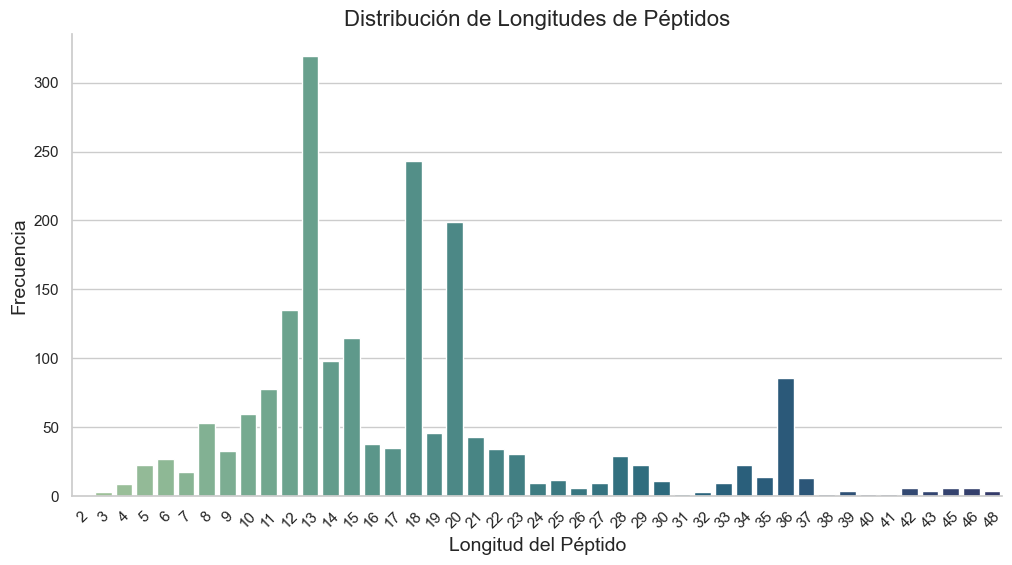

In [83]:
# Contar la cantidad de péptidos por longitud
length_counts = df_data["length_sequence"].value_counts().sort_index()

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x=length_counts.index, y=length_counts.values, palette="crest")

plt.xlabel("Longitud del Péptido", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.title("Distribución de Longitudes de Péptidos", fontsize=16)
plt.xticks(rotation=45)
sns.despine()

plt.savefig("../../img/antiviral/length_sequence_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_data, 
    x="length_sequence", 
    hue="hl_category", 
    hue_order=hl_order,  # Orden correcto
    multiple="stack",  # Apila las barras
    bins=range(df_data["length_sequence"].min(), df_data["length_sequence"].max() + 1), 
    palette=colors_antiviral,
    edgecolor="black",
    kde=True  # Mueve kde=True aquí correctamente
)

plt.xlabel("Longitud del Péptido", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.title("Distribución de Longitudes de Péptidos por Categoría de Vida Media", fontsize=16)
plt.xticks(rotation=45)
sns.despine()

plt.savefig("../../img/antiviral/length_sequence_category.png", dpi=300, bbox_inches="tight")
plt.show()

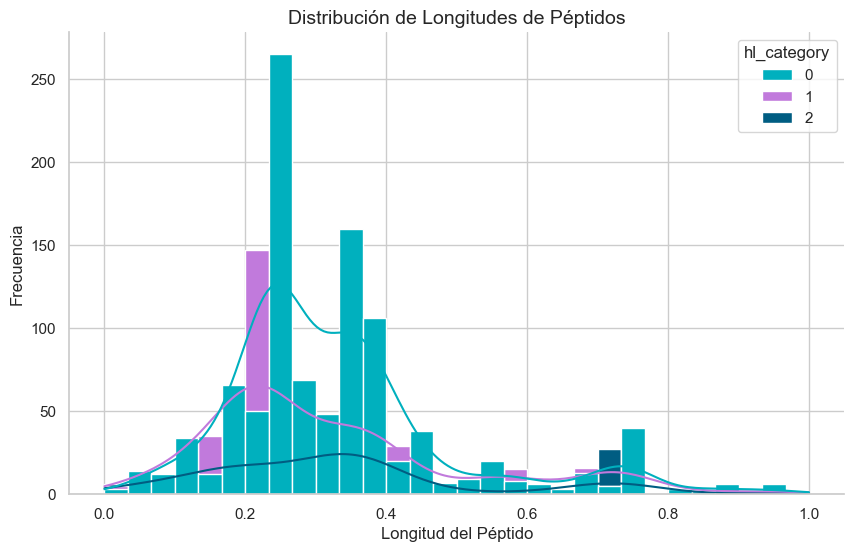

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_data["length_minmax"] = df_data.groupby("hl_category")["length_sequence"].transform(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())

# Graficar histogramas normalizados con MinMax
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_data,
    x="length_minmax",
    hue="hl_category",
    hue_order=hl_order,  
    palette=colors_antiviral2,
    bins=30,
    alpha=1,
    kde=True
)

plt.xlabel("Longitud del Péptido", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.title("Distribución de Longitudes de Péptidos", fontsize=14)
sns.despine()
plt.savefig("../../img/antiviral/length_sequence_category_standarized.png", dpi=300, bbox_inches="tight")
plt.show()

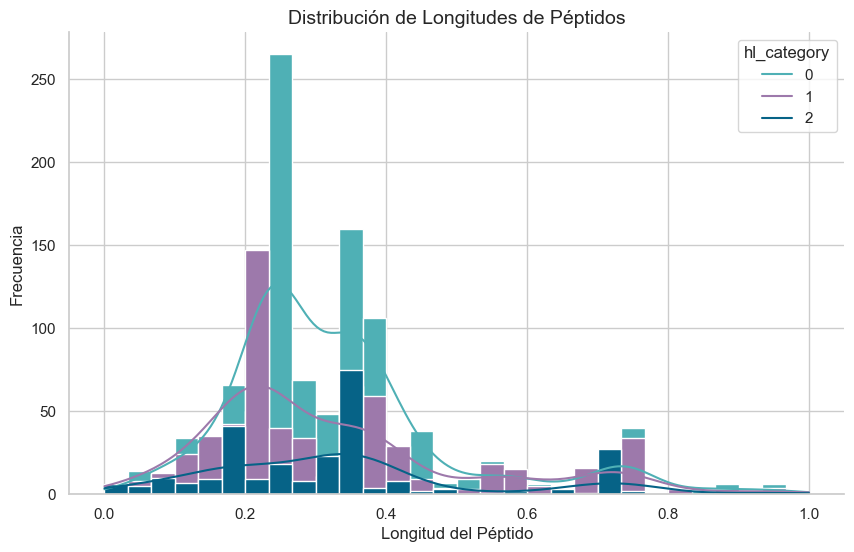

In [85]:
plt.figure(figsize=(10, 6))

for category, color in zip(hl_order, colors_antiviral):
    sns.histplot(
        data=df_data[df_data["hl_category"] == category],
        x="length_minmax",
        color=color,
        bins=30,
        kde=True,
        alpha=1
    )

plt.xlabel("Longitud del Péptido", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.title("Distribución de Longitudes de Péptidos", fontsize=14)
sns.despine()
plt.legend(title="hl_category", labels=hl_order)
plt.savefig("../../img/antiviral/length_sequence_category_solid.png", dpi=300, bbox_inches="tight")
plt.show()

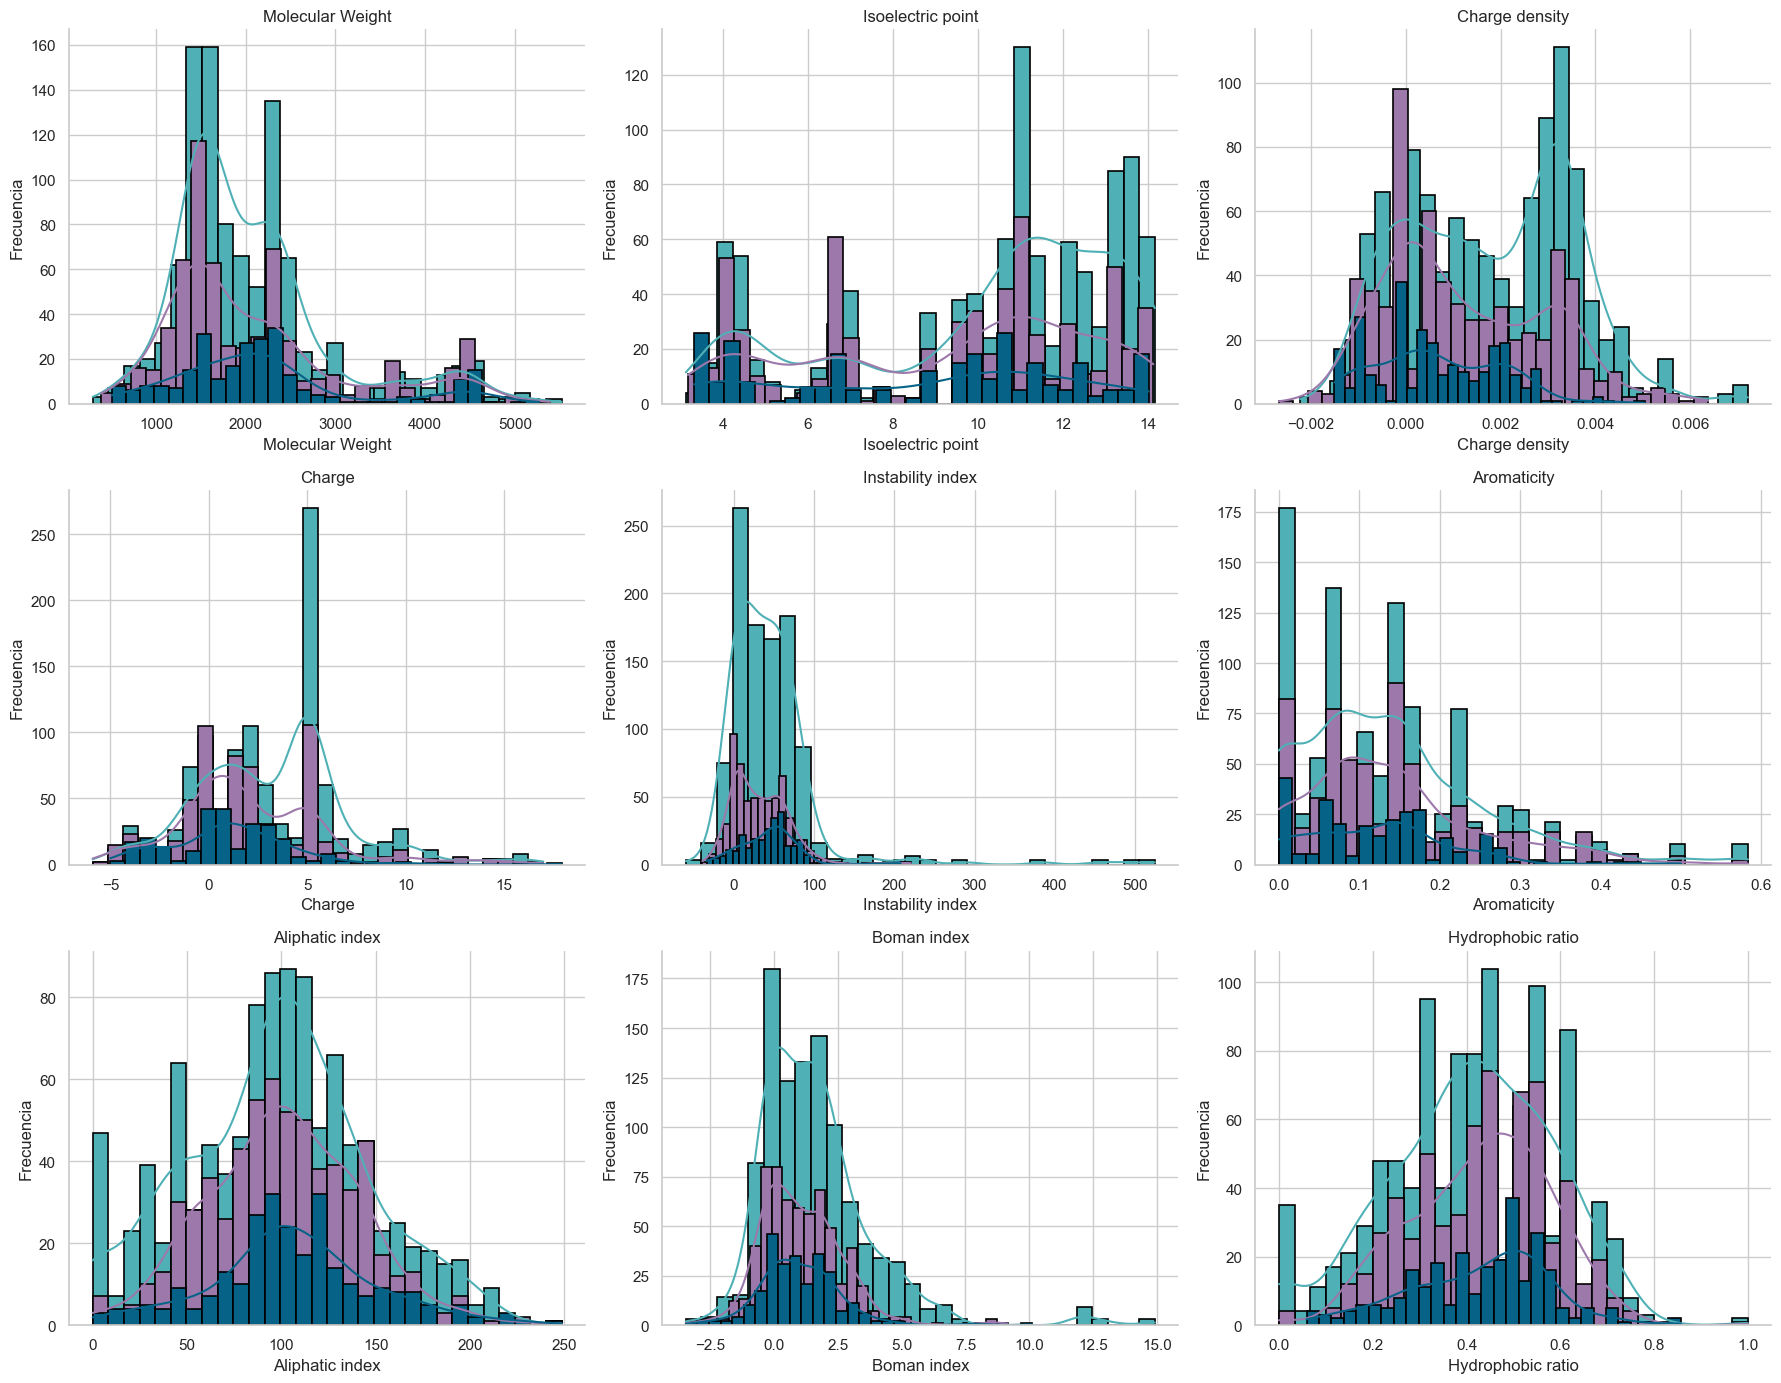

In [86]:
fig = plt.figure(figsize=(18, 14))
gs = plt.GridSpec(3, 3, figure=fig)  # Ajustamos a 3x3 si hay 9 gráficos

for i, col in enumerate(columns_with_properties):
    row, col_position = divmod(i, 3)
    ax = fig.add_subplot(gs[row, col_position])
    
    for category, color in zip(hl_order, colors_antiviral):
        subset = df_data[df_data["hl_category"] == category]
        
        # Histograma con bordes negros y líneas de densidad
        sns.histplot(
            data=subset,
            x=col,
            color=color,
            bins=30,
            kde=True,
            ax=ax,
            alpha=1,  # Colores sólidos
            edgecolor="black",  # Bordes negros para separar barras
            linewidth=1.2  # Grosor de los bordes
        )

    ax.set_title(col, fontsize=12)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)

sns.despine()
plt.tight_layout()
plt.savefig("../../img/antiviral/histplot_hl_category_solid.png", dpi=300, bbox_inches="tight")
plt.show()


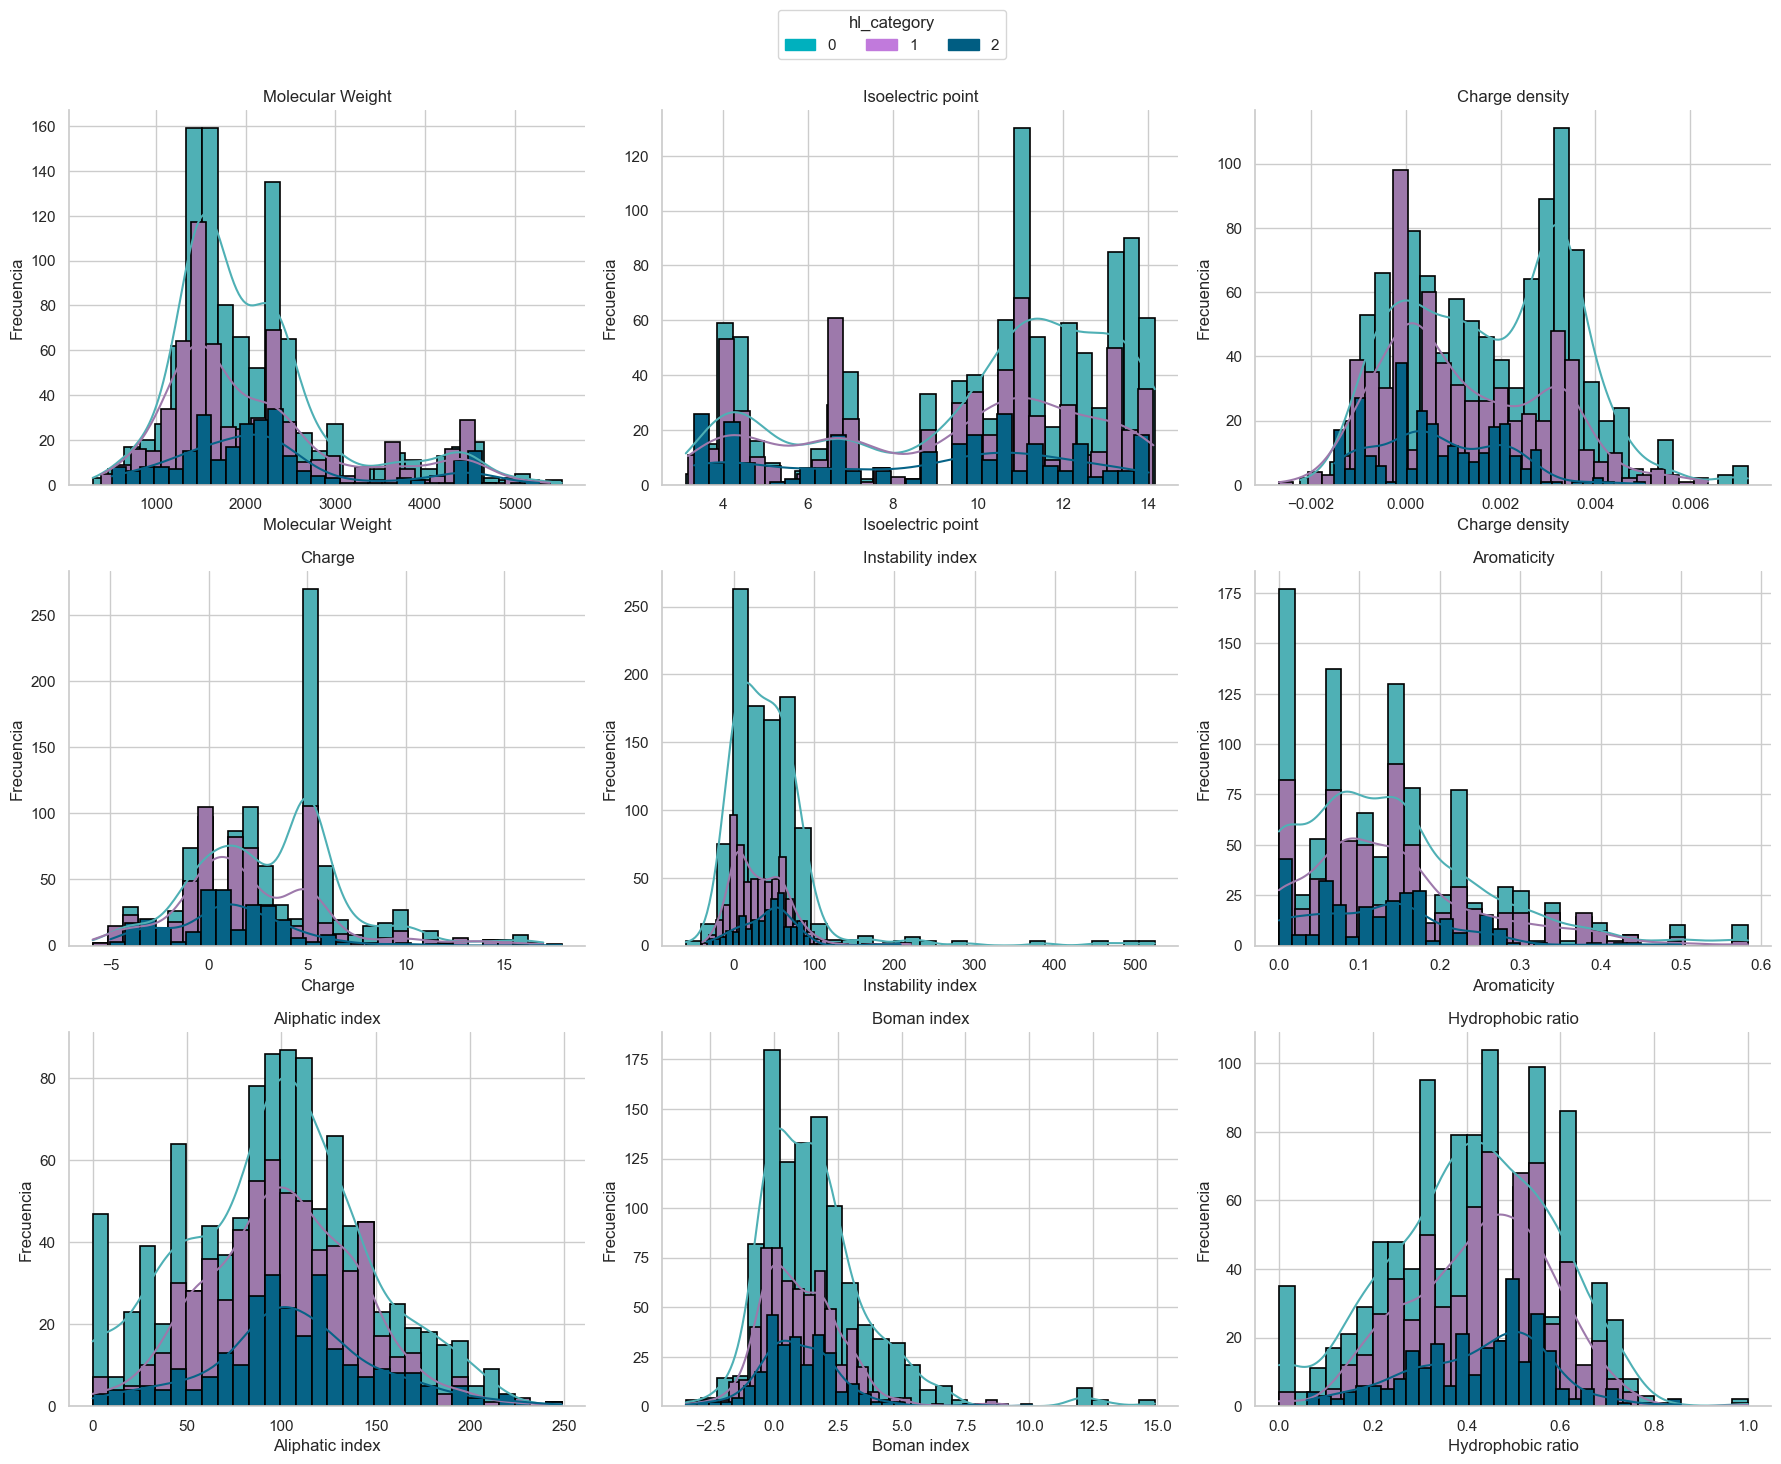

In [87]:
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(18, 14))
gs = plt.GridSpec(3, 3, figure=fig)  # Ajustamos a 3x3 si hay 9 gráficos

legend_patches = [mpatches.Patch(color=color, label=category) for category, color in zip(hl_order, colors_antiviral2)]

for i, col in enumerate(columns_with_properties):
    row, col_position = divmod(i, 3)
    ax = fig.add_subplot(gs[row, col_position])
    
    for category, color in zip(hl_order, colors_antiviral):
        subset = df_data[df_data["hl_category"] == category]
        
        sns.histplot(
            data=subset,
            x=col,
            color=color,
            bins=30,
            kde=True,
            ax=ax,
            alpha=1,
            edgecolor="black",
            linewidth=1.2
        )

    ax.set_title(col, fontsize=12)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)

sns.despine()

# Agregar una única leyenda a toda la figura
fig.legend(handles=legend_patches, title="hl_category", loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=len(hl_order))

plt.tight_layout()
plt.savefig("../../img/antiviral/histplot_hl_category_solid_legend.png", dpi=300, bbox_inches="tight")
plt.show()
